<img src="../img/spainAI.png" width="300">

# MasterClass Aprendizaje por Imágenes
# Métodos de Clustering (Algoritmo KMeans)

### Profesor: Jorge Calvo

# Métodos de clustering basados en particiones - KMeans


En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones, como el K-means.

Para empezar, cargamos las librerías que vamos a necesitar:

In [1]:
import numpy as np
import itertools as it

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Cargamos el dataset con el que vamos a trabajar:

El dataset cargado tiene 500 instancias.


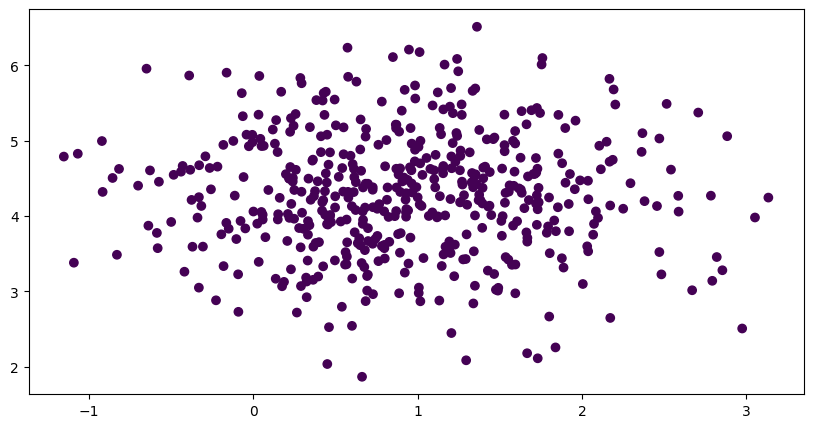

In [2]:
Dx, Dy = make_blobs(n_samples=500, centers=1, random_state=0, cluster_std=0.8)

print('El dataset cargado tiene',Dy.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

El algoritmo K-means tiene un único parámetro: el número de clústeres (K). Una vez fijado este valor, el primer paso consiste en elegir unos centros iniciales.

Los centros iniciales elegidos aleatoriamente son:
[[ 1.30640357  5.37292189]
 [-0.43271414  6.3816824 ]
 [ 1.27527818  1.87638892]]


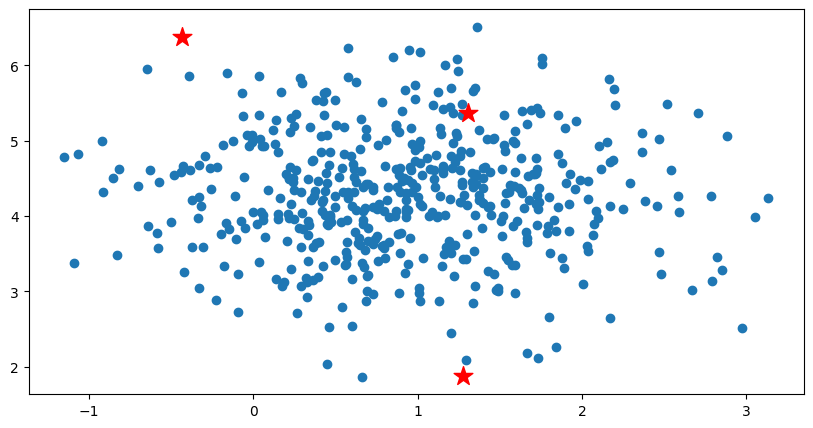

In [3]:
# Elegimos un número de clústeres a buscar
K = 3

cDx = np.zeros(K*Dx.shape[1])
cDx.shape = (K,Dx.shape[1])
#print(cDx)

def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

for d in np.arange(Dx.shape[1]):
    cDx[:,d] = random_sample_float(K, np.min(Dx[:,d]), np.max(Dx[:,d]))

print('Los centros iniciales elegidos aleatoriamente son:')
print(cDx)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

Vamos ahora a implementar el algoritmo de K-means.

Recordad que el algoritmo K-means es un proceso iterativo en el que se van ajustando los grupos para producir el resultado final. 

Se parte de los datos y de una inicialización aleatoria de los centros de tantos clusters como queremos encontrar, y a partir de ahí se realizan dos operaciones iterativamente:

1.   Paso de asignación de datos

En este paso, cada elemento de nuestro dataset se asigna al centroide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

2.   Paso de actualización del centroide

En este paso se recalcula el centroide de cada cluster, teniendo en cuenta la nueva asignación calculada en el paso 1. Para ello, se calcula la media de todos los puntos asignados en el paso anterior.

$$
c_i = \frac{1}{\left | S_i \right |} \sum_{x_i \in S_i} x_i
$$

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

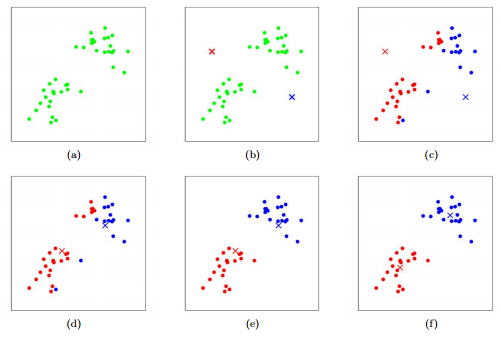

## Implementación


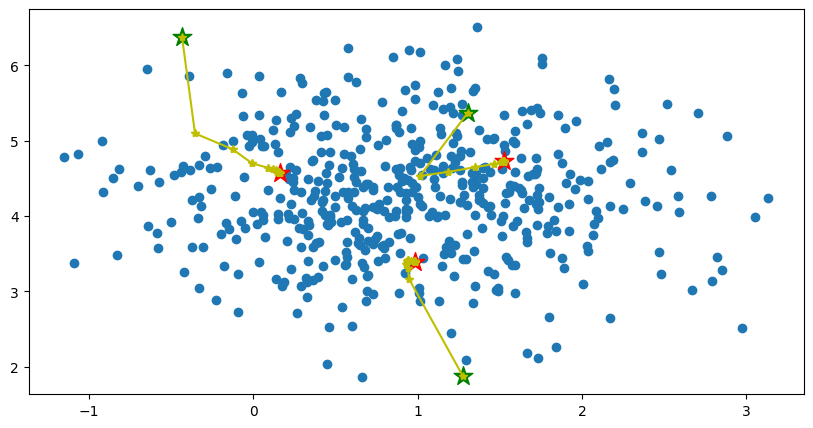

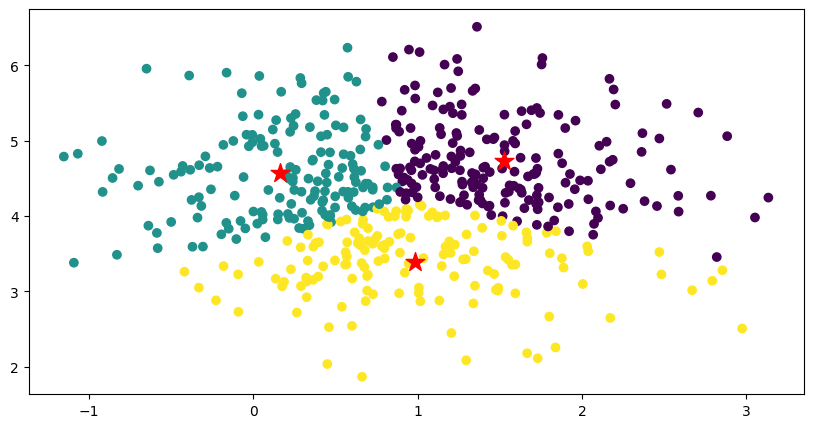

In [4]:
# Definimos la distancia euclidiana de una instancia x 
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):   
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

# Preparamos el vector donde guardamos la asignación de cada elemento 
# a un clúster (1,...,K)
Dyp = np.zeros(Dx.shape[0])

fig1, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='g')

# Flag de convergencia
iterando = True

while iterando:

    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()

    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.
        distancia_punto_a_centros =distancia_euclidiana_grupo(Dx[i],cDx)
        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y

    # Calcular los nuevos centros
    for k in range(K):
        # Necesitamos recalcular la media de las coordenadas de los elementos 
        # asignados a cada cluster. Recordad que cDx es la matriz donde almacenamos
        # los centroides, así que tendrá la forma (k, 2).

        # Para calcular la media de los elementos de un cluster, primero necesitamos
        # saber qué elementos pertenecen a ese cluster, lo cual podemos obtener usando
        # `Dyp` y `k`. Esto nos devolverá un vector de booleanos que podremos usar con
        # `Dx` para obtener las coordenadas de los elementos del cluster `k`. Una vez
        # disponemos de dichas coordenadas, simplemente tenemos que calcular la media.
        # Tened en cuenta que `np.mean` reduce la media a 1 único valor, y nosotros 
        # necesitamos 2 valores, uno para la coordenada x y otro para la y.
        # Podéis usar el argumento `axis` para indicarle a np.mean sobre qué dimensión
        # de la matriz de puntos `Dx` queréis realizar la media.
        
        #Concateno los centroides con los puntos para saber a cual corresponde y luego filtrar con np.where
        DxC=np.concatenate((Dx,Dyp.reshape(Dy.size,1)), axis=1)
        cDx[k,:] = np.mean(DxC[:,(0,1)][np.where(DxC[:,2]==k)],axis=0)

    for k in np.arange(K):
        ax.plot( [cDx_ant[k,0], cDx[k,0]],[cDx_ant[k,1], cDx[k,1]], linestyle='-', marker='*', c='y')
    
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)

ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# Ver asignaciones finales
fig2, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')